In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/dataset/data/train'
validation_dir = '/content/drive/MyDrive/dataset/data/validation'


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator to load and augment images
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Create the validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Print class indices to check the number of classes
print("Class indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)


Found 14342 images belonging to 4 classes.
Found 3489 images belonging to 4 classes.
Class indices: {'broken': 0, 'discolored': 1, 'pure': 2, 'silkcut': 3}


Epoch 1/20
449/449 - 4208s - loss: 1.2386 - accuracy: 0.4311 - val_loss: 1.0866 - val_accuracy: 0.5064 - 4208s/epoch - 9s/step
Epoch 2/20
449/449 - 102s - loss: 1.0952 - accuracy: 0.5008 - val_loss: 1.0452 - val_accuracy: 0.5406 - 102s/epoch - 227ms/step
Epoch 3/20
449/449 - 103s - loss: 1.0324 - accuracy: 0.5294 - val_loss: 0.9931 - val_accuracy: 0.5486 - 103s/epoch - 228ms/step
Epoch 4/20
449/449 - 102s - loss: 1.0006 - accuracy: 0.5473 - val_loss: 0.9510 - val_accuracy: 0.5767 - 102s/epoch - 228ms/step
Epoch 5/20
449/449 - 102s - loss: 0.9736 - accuracy: 0.5699 - val_loss: 0.9341 - val_accuracy: 0.5864 - 102s/epoch - 227ms/step
Epoch 6/20
449/449 - 102s - loss: 0.9317 - accuracy: 0.5954 - val_loss: 1.0038 - val_accuracy: 0.5735 - 102s/epoch - 227ms/step
Epoch 7/20
449/449 - 102s - loss: 0.9041 - accuracy: 0.6103 - val_loss: 0.8944 - val_accuracy: 0.6056 - 102s/epoch - 227ms/step
Epoch 8/20
449/449 - 102s - loss: 0.8847 - accuracy: 0.6208 - val_loss: 0.9185 - val_accuracy: 0.6076 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


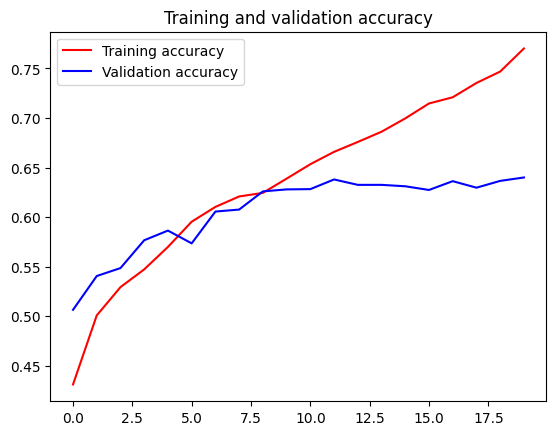

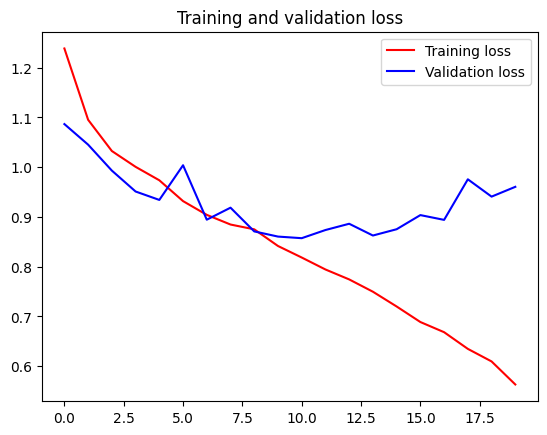

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjusting to match the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=20,
    verbose=2
)
# Save the model after training
model.save("/content/drive/My Drive/seed_purity_model.h5")

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Load the saved model
model = load_model("/content/drive/My Drive/seed_purity_model.h5")

# Function to preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict seed purity
def predict_seed_purity(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Test the model with a new image
test_image_path = '/content/drive/My Drive/dataset/data/test.jpg'  # Replace with your test image path
predicted_class = predict_seed_purity(model, test_image_path)

# Assuming 0 corresponds to pure and other classes correspond to impure
class_indices = {'broken': 0, 'discolored': 1, 'pure': 2, 'silkcut': 3}
pure_label_index = class_indices['pure']

if predicted_class == pure_label_index:
    print("The seed is classified as pure.")
else:
    print("The seed is classified as impure.")
